<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.


## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database


**Install and import the required libraries**


In [49]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 1: Load the dataset


In [50]:
file_path = "cleaned_survey_data_V2.csv"

df = pd.read_csv(file_path)
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceRange
0,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)",Other,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,100.0,100.0,100.0,50.0,90.0,Too long,Easy,7322.0,10,0-5
1,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Books;Social Media;Wri...,API document(s) and/or SDK document(s),...,0.0,0.0,0.0,0.0,0.0,Too long,Difficult,91295.0,10,5-10
2,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Hobby;School or academic work,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Written Tutorials;Stack Overflow;Coding sessio...,Other,...,30.0,5.0,20.0,10.0,5.0,Too long,Easy,110000.0,10,5-10
3,393,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Other,Technical documentation;Blogs;Written Tutorial...,Other,...,5.0,10.0,0.0,0.0,5.0,Appropriate in length,Neither easy nor difficult,161044.0,7,10-20
4,399,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Other,Some college/university study without earning ...,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,10.0,30.0,0.0,0.0,0.0,Appropriate in length,Easy,195000.0,5,>20


In [51]:
df.duplicated().sum()

0

In [52]:
# Replace missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()), axis=0)

# Replace missing values in text columns with the mode
text_cols = df.select_dtypes(include=['object']).columns
df[text_cols] = df[text_cols].apply(lambda x: x.fillna(x.mode()[0]), axis=0)

null_counts = df.isnull().sum().sum()
clean_df = df[df.isnull().sum(axis=1) > 0]
df.to_csv("cleaned_survey_data_V2.csv", index=False)


In [53]:
df['ConvertedCompYearly']

0          7322.000000
1         91295.000000
2        110000.000000
3        161044.000000
4        195000.000000
             ...      
25741     86751.150481
25742     86751.150481
25743     86751.150481
25744     86751.150481
25745     86751.150481
Name: ConvertedCompYearly, Length: 25746, dtype: float64

### Task 1: Exploring Relationships with Scatter Plots


#### 1. Scatter Plot for Age vs. Job Satisfaction


Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.


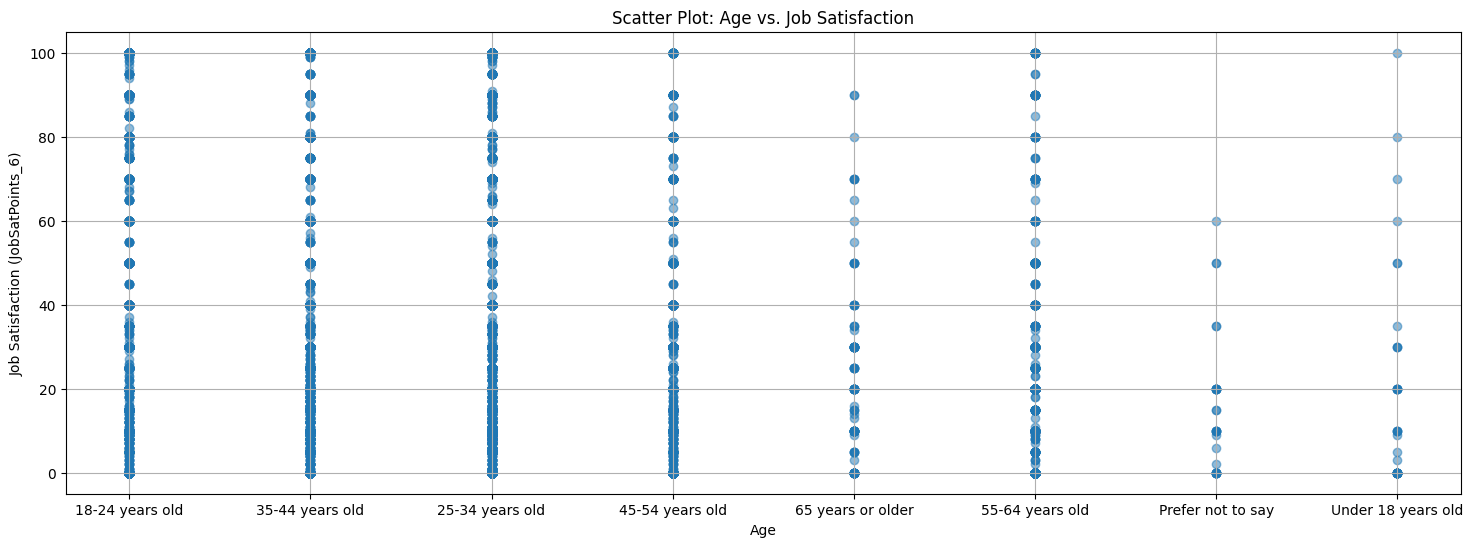

In [54]:
## Write your code here
# Scatter plot for Age vs. Job Satisfaction
plt.figure(figsize=(18, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot: Age vs. Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


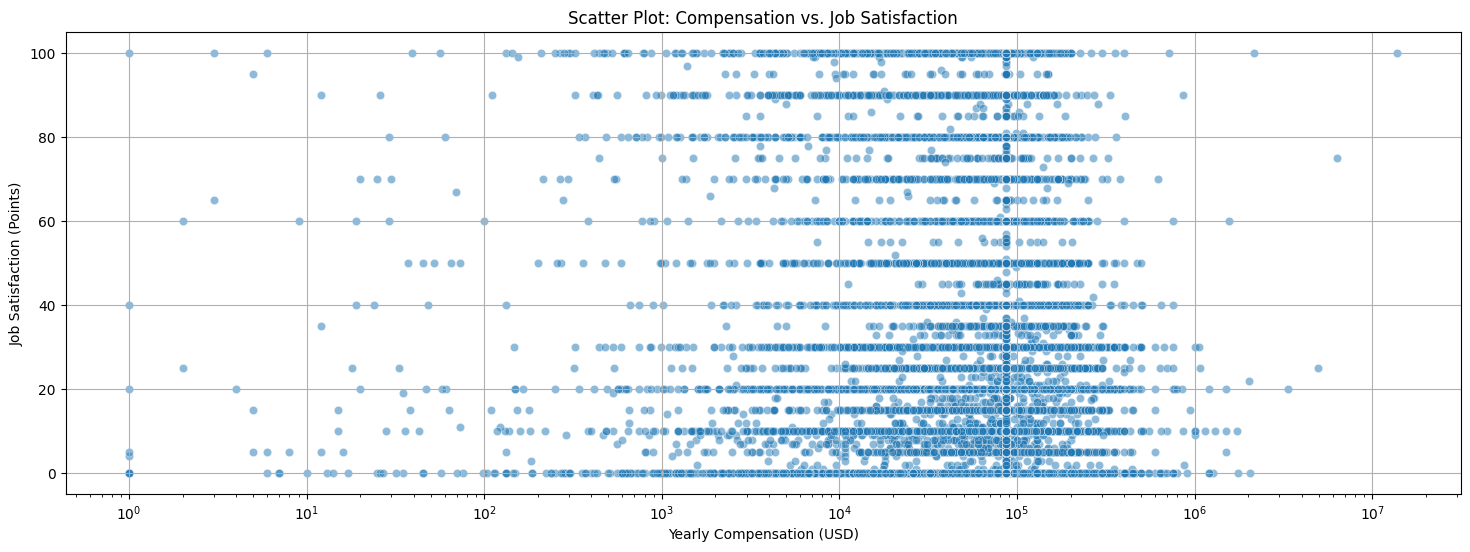

In [55]:
import numpy as np
import seaborn as sns


# Convert JobSatPoints_6 to numeric, handling errors if any
df["JobSatPoints_6"] = pd.to_numeric(df["JobSatPoints_6"], errors="coerce")

# Drop rows with NaN values in relevant columns
df_filtered = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6"])

# Scatter plot
plt.figure(figsize=(18, 6))
sns.scatterplot(x=df_filtered["ConvertedCompYearly"], y=df_filtered["JobSatPoints_6"], alpha=0.5)
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.title("Scatter Plot: Compensation vs. Job Satisfaction")
plt.xscale("log")  # Log scale for better visualization if values vary widely
plt.grid(True)
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction


Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


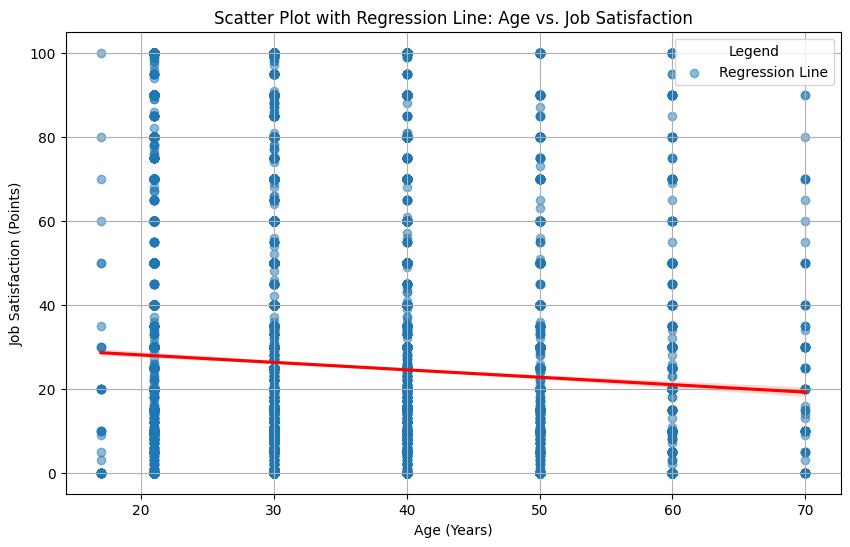

In [66]:
## Write your code here
# Define an age mapping to convert age ranges into numerical values
age_mapping = {
    "Under 18 years old": 17,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

# Convert Age column to numerical values
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
scatter = sns.regplot(x=df['AgeNumeric'], y=df["JobSatPoints_6"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Age (Years)")
plt.ylabel("Job Satisfaction (Points)")
plt.title("Scatter Plot with Regression Line: Age vs. Job Satisfaction")
plt.grid(True)

# Add legend
plt.legend(["Regression Line"], title="Legend")
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


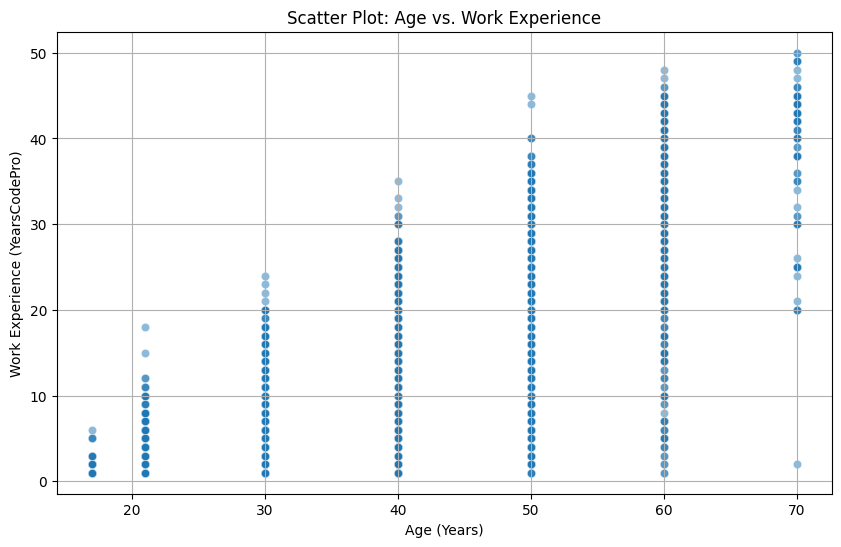

In [67]:
## Write your code here
# Scatter plot for Age vs. Work Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['AgeNumeric'], y=df['YearsCodePro'], alpha=0.5)
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.title('Scatter Plot: Age vs. Work Experience')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size


Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


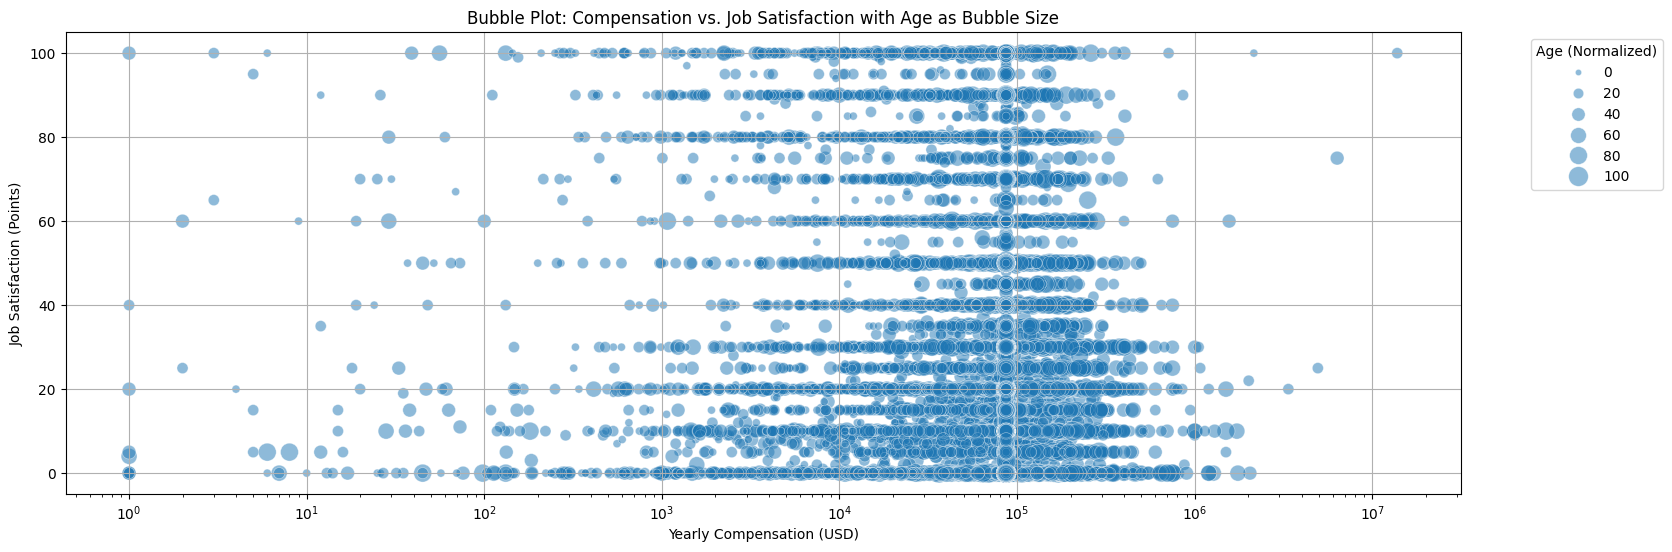

In [70]:
## Write your code here
# Bubble plot for Compensation vs. Job Satisfaction with Age as Bubble Size
plt.figure(figsize=(18, 6))

# Normalize the AgeNumeric for bubble size
age_size = (df['AgeNumeric'] - df['AgeNumeric'].min()) / (df['AgeNumeric'].max() - df['AgeNumeric'].min()) * 100

scatter = sns.scatterplot(
    x=df['ConvertedCompYearly'],
    y=df['JobSatPoints_6'],
    size=age_size,
    sizes=(20, 200),
    alpha=0.5,
    legend="brief"
)

plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.title('Bubble Plot: Compensation vs. Job Satisfaction with Age as Bubble Size')
plt.xscale('log')  # Log scale for better visualization if values vary widely
plt.grid(True)

# Add a guideline legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, labels, title="Age (Normalized)", loc="upper right", bbox_to_anchor=(1.15, 1))

plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


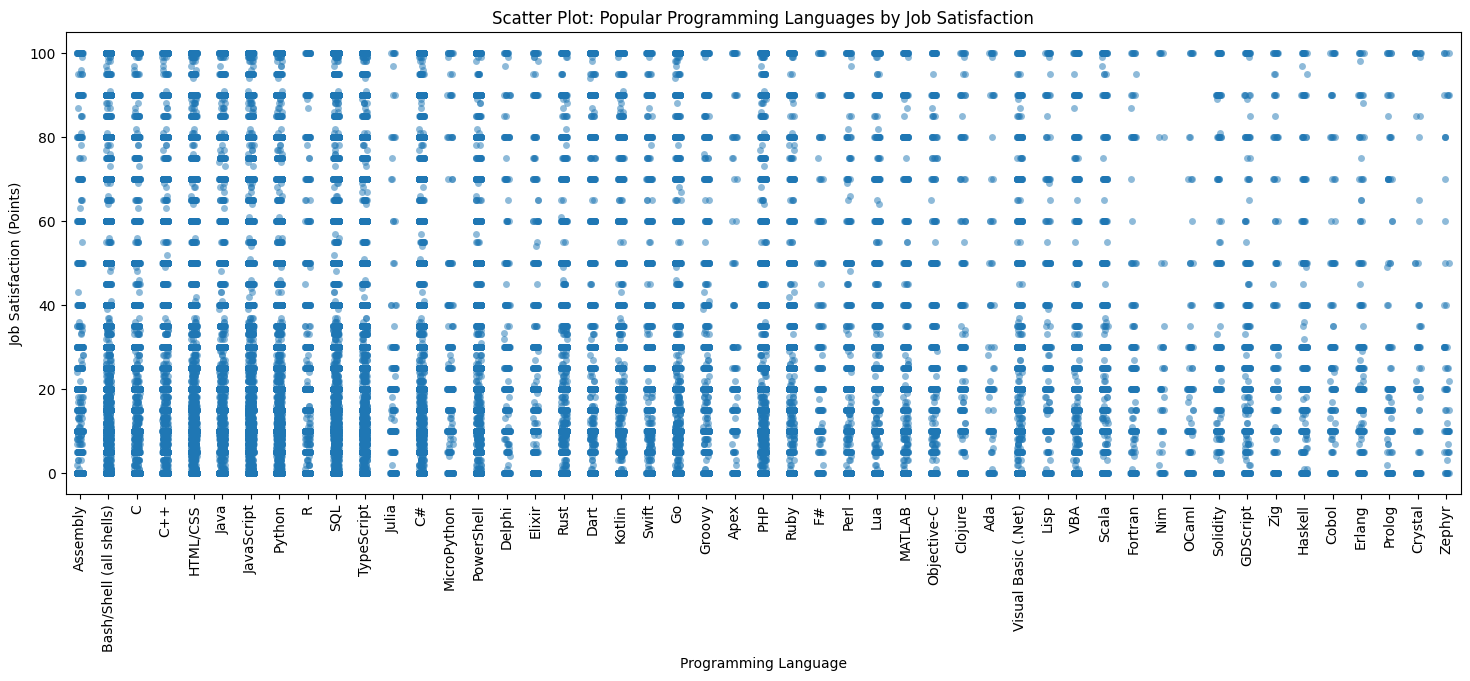

In [76]:
## Write your code here

# Transform the column: explode into multiple rows
df_exploded = df.assign(Language=df["LanguageHaveWorkedWith"].str.split(";")).explode("Language")

# Clean the new Language column
df_exploded["Language"] = df_exploded["Language"].str.strip()

# Drop NaN values
df_exploded = df_exploded.dropna(subset=["Language", "JobSatPoints_6"])

# Scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.stripplot(x=df_exploded["Language"], y=df_exploded["JobSatPoints_6"], jitter=True, alpha=0.5)
plt.xticks(rotation=90)
plt.xlabel("Programming Language")
plt.ylabel("Job Satisfaction (Points)")
plt.title("Scatter Plot: Popular Programming Languages by Job Satisfaction")
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


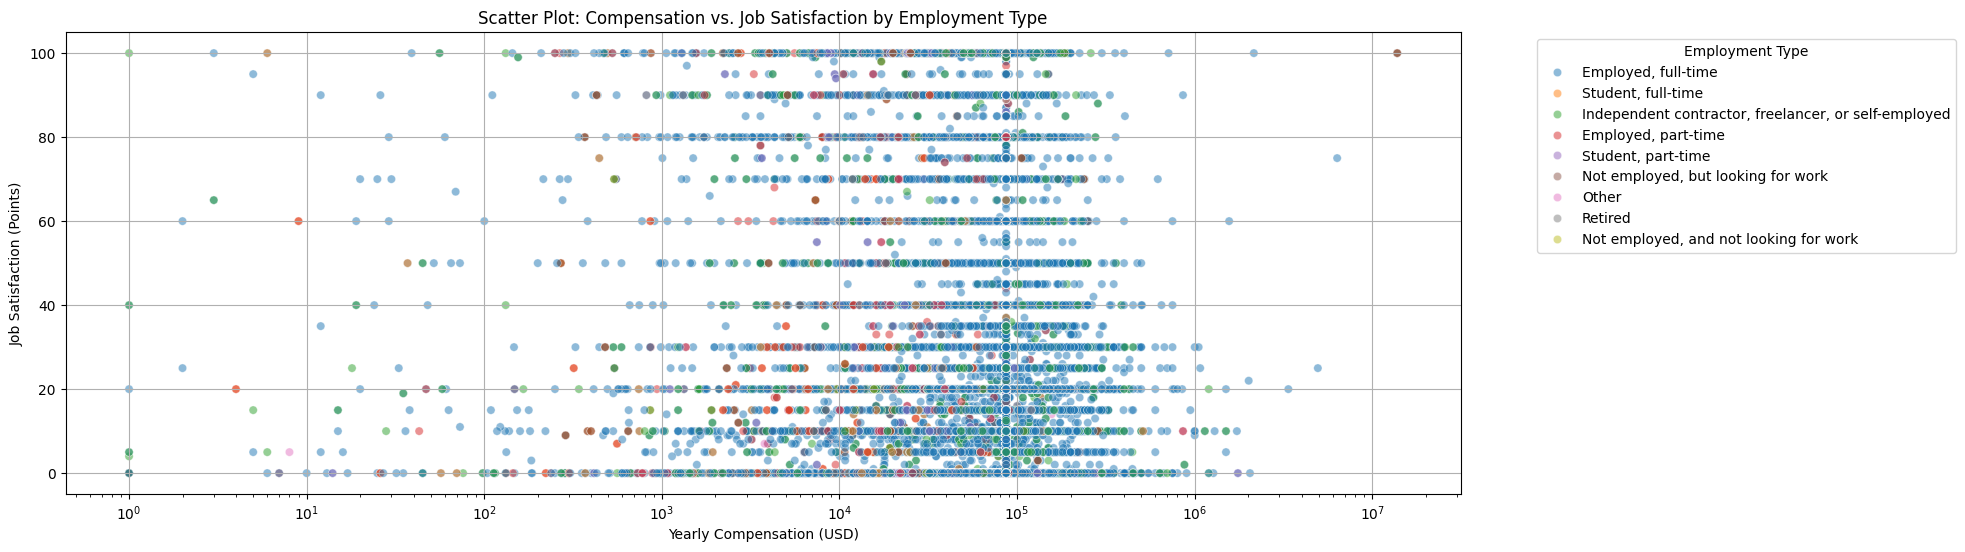

In [81]:
## Write your code here

# Transform the column: explode into multiple rows
df_exploded = df.assign(Employment=df["Employment"].str.split(";")).explode("Employment")

# Clean the new Employment column
df_exploded["Employment"] = df_exploded["Employment"].str.strip()

# Scatter Plot for Compensation vs. Job Satisfaction by Employment Type
plt.figure(figsize=(18, 6))

# Scatter plot with color coding by Employment type
sns.scatterplot(
    data=df_exploded,
    x="ConvertedCompYearly",
    y="JobSatPoints_6",
    hue="Employment",
    alpha=0.5
)

plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (Points)")
plt.title("Scatter Plot: Compensation vs. Job Satisfaction by Employment Type")
plt.xscale("log")  # Log scale for better visualization if values vary widely
plt.grid(True)
plt.legend(title="Employment Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


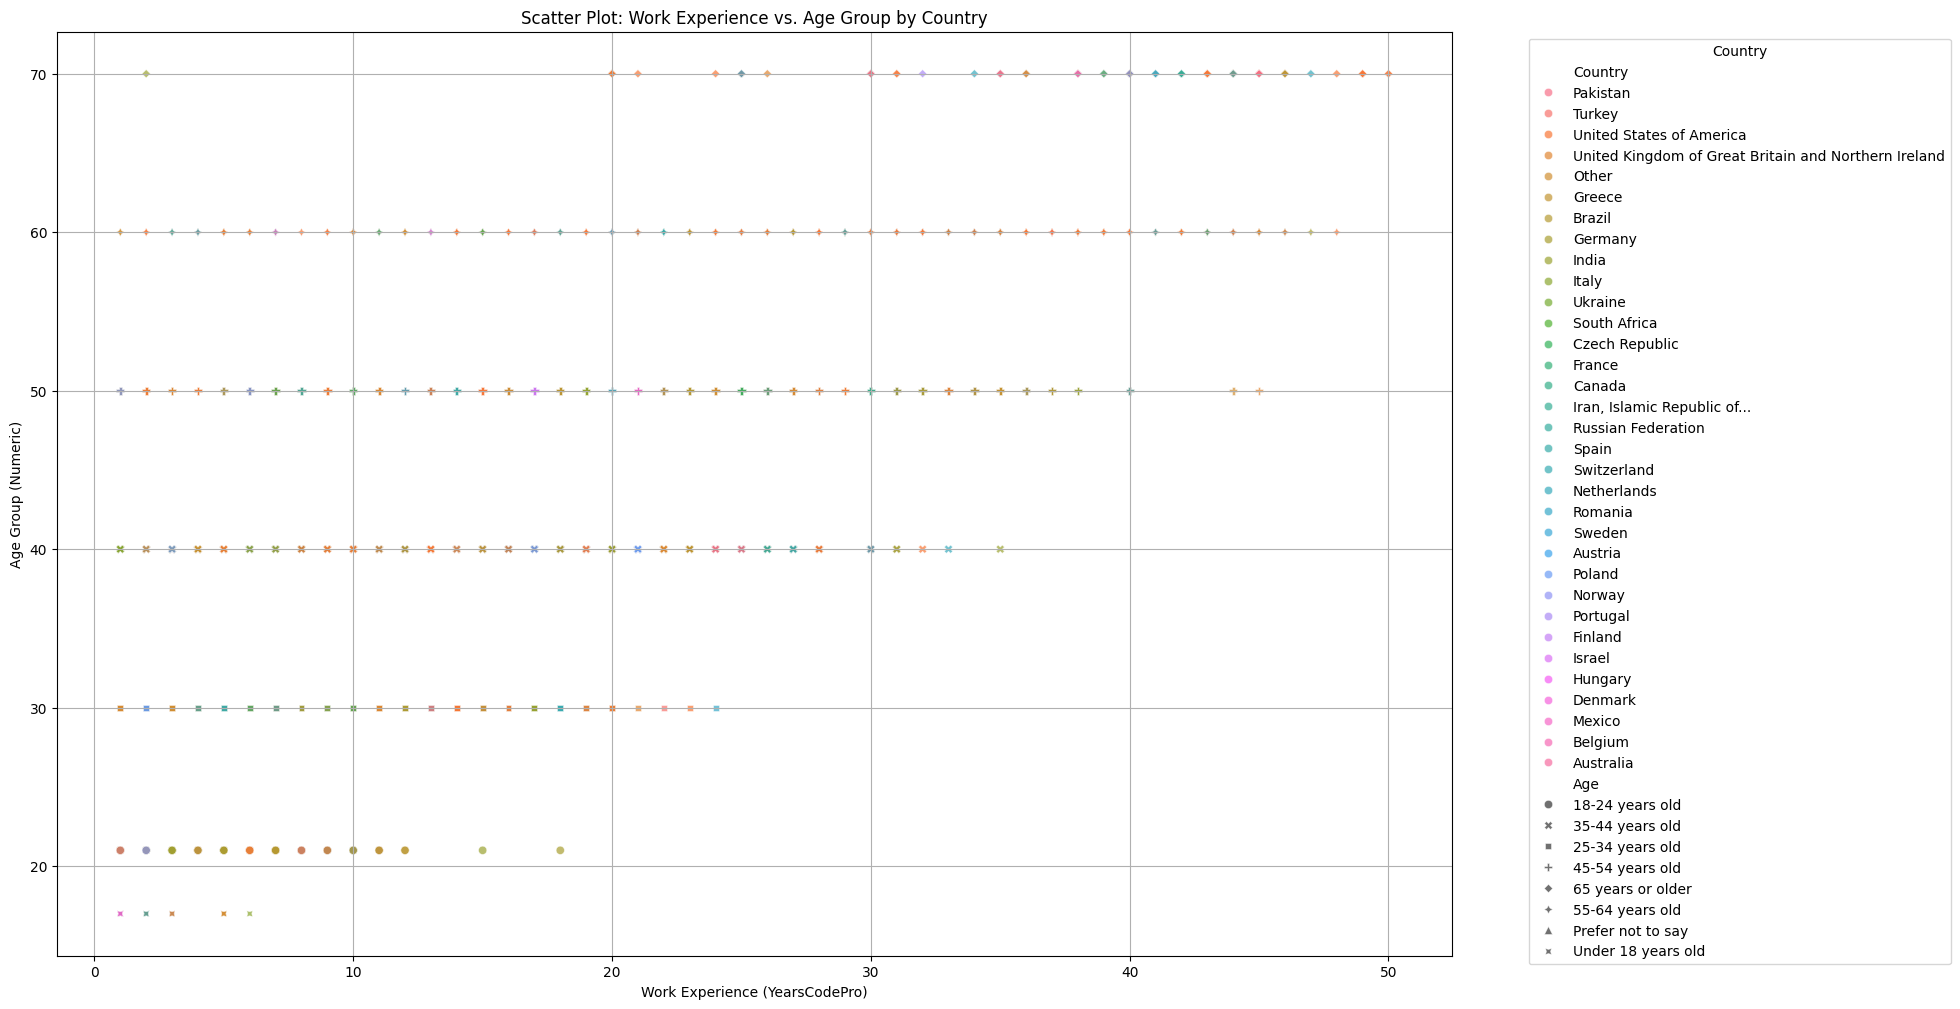

In [83]:
## Write your code here
# Scatter Plot for Work Experience vs. Age Group by Country
plt.figure(figsize=(18, 12))

# Scatter plot with color coding by Country and markers for Age groups
sns.scatterplot(
    data=df_filtered,
    x="YearsCodePro",
    y="AgeNumeric",
    hue="Country",
    style="Age",
    alpha=0.7
)

plt.xlabel("Work Experience (YearsCodePro)")
plt.ylabel("Age Group (Numeric)")
plt.title("Scatter Plot: Work Experience vs. Age Group by Country")
plt.grid(True)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:

- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:

Ayushi Jain


### Other Contributors:

- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
